In [284]:
import numpy as np
from math import sin, cos, pi, e, sqrt, inf
import matplotlib.pyplot as plt
from scipy.linalg import eigh

In [285]:
h = 6.62607015e-34 # Дж * с
h_bar = h / (2*pi)

U = 4e-18
# m = 9.109e-31    
m = 9.109e-31
a = 1e-10
b = a
total_barriers = 20
x_min = 0
x_max = total_barriers*(a+b) + a
N = 1000

Гамильтониан

$$ -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + U(x) $$

Аппроксимация второй производной

<tex>$${{d^2f}\over{dx^2}} \approx {f(x - dx) - 2f(x) + {f(x + dx)}\over{dx^2}}$$<tex>

In [286]:
# Создание сетки значений координаты
xs = np.linspace(x_min, x_max, N)

# Вычисление расстояния между узлами сетки
dx = xs[1] - xs[0]

# Оператор Гамильтониана
H = np.zeros((N, N))
c = -(h_bar**2)/(2*m*(dx**2))
for i in range(N):
    x = xs[i]
    u = 0 if (x % (a+b) < a) else U
    H[i][i] = c*(-2) + u
    if i > 0:
        H[i][i-1] = c
    if i < N - 1:
        H[i][i+1] = c

E1: 1.4959569235200777e-18
E2: 1.503941004278689e-18
E3: 1.5135809550127051e-18


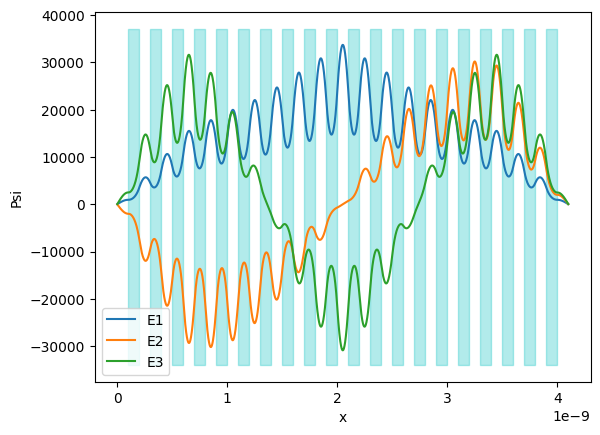

In [287]:
# Вычисление собственных значений и собственных векторов оператора Гамильтона
eigenvalues, eigenvectors = eigh(H)

psi_min, psi_max = inf, -inf # вспомогательные значения для графики
for i in range(3):
    # Нормализуем пси функцию
    psi_values = eigenvectors[:, i]
    psi_values = psi_values / (np.square(psi_values).sum() * dx)**(1/2)

    psi_min = min(psi_values.min(), psi_min)
    psi_max = max(psi_values.max(), psi_max)

    plt.plot(xs, psi_values, label=f'E{i+1}')
    print(f'E{i+1}: {eigenvalues[i]}')

# Отмечаем стенки на графике
for i in range(total_barriers):
    x1 = (a+b)*i + a
    x2 = (a+b)*(i+1)
    y_min = psi_min*1.1
    y_max = psi_max*1.1
    plt.fill_between((x1, x2), y_min, y_max, color='c', alpha=0.3)
    
plt.legend()
plt.xlabel('x')
plt.ylabel('Psi')
plt.show()

40


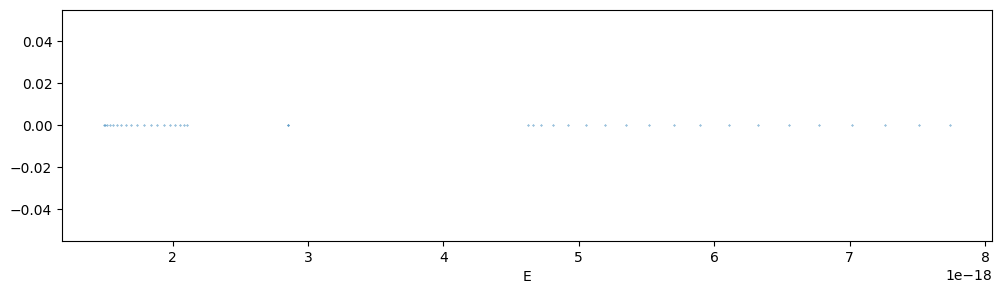

In [291]:
from bisect import bisect_left

Es = eigenvalues
Es = sorted(Es)
Es = Es[:bisect_left(Es, U*2)]
print(len(Es))
fig = plt.figure(figsize=(12, 3))
ax = fig.gca()
ax.scatter(Es, np.zeros(len(Es)), s=0.1)
plt.xlabel("E")
plt.show()